In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
johnsmith88_heart_disease_dataset_path = kagglehub.dataset_download('johnsmith88/heart-disease-dataset')

print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


________________________________________________________________

# > **🫀Heart Disease Prediction By Jyotsna**
______________________________________________________________________

# **Importing Libraries**

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate,  cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time
from time import time
from sklearn.metrics import roc_auc_score, make_scorer
import warnings
warnings.filterwarnings("ignore")

### *`The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.`*

# 1 . Load the dataset

In [ ]:
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:

# Rename the columns for better readability
df.columns = ['Age', 'Sex', 'CheastPainType', 'RestingBP',
              'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'NumMajorVessels', 'Thal', 'Target' ]

In [ ]:
df.head(1)

,Age,Sex,CheastPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,NumMajorVessels,Thal,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0


In [ ]:
# Shape of dataset
df.shape

(1025, 14)

In [ ]:
# Checking for missing values
df.isnull().sum()

,0
Age,0
Sex,0
CheastPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
# Describe the dataset
df.describe()

,Age,Sex,CheastPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,NumMajorVessels,Thal,Target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1025 non-null   int64  
 1   Sex              1025 non-null   int64  
 2   CheastPainType   1025 non-null   int64  
 3   RestingBP        1025 non-null   int64  
 4   Cholesterol      1025 non-null   int64  
 5   FastingBS        1025 non-null   int64  
 6   RestingECG       1025 non-null   int64  
 7   MaxHR            1025 non-null   int64  
 8   ExerciseAngina   1025 non-null   int64  
 9   Oldpeak          1025 non-null   float64
 10  ST_Slope         1025 non-null   int64  
 11  NumMajorVessels  1025 non-null   int64  
 12  Thal             1025 non-null   int64  
 13  Target           1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#### Luckily, we have no missing values

In [ ]:
df['Target'].unique()

array([0, 1])

______________________________________________________
### *`Clearly this is a classification problem, with the target variable having values '0' and '1'`*
____________________________________________


# 2.  **Exploratory Data Analysis**

<Axes: >

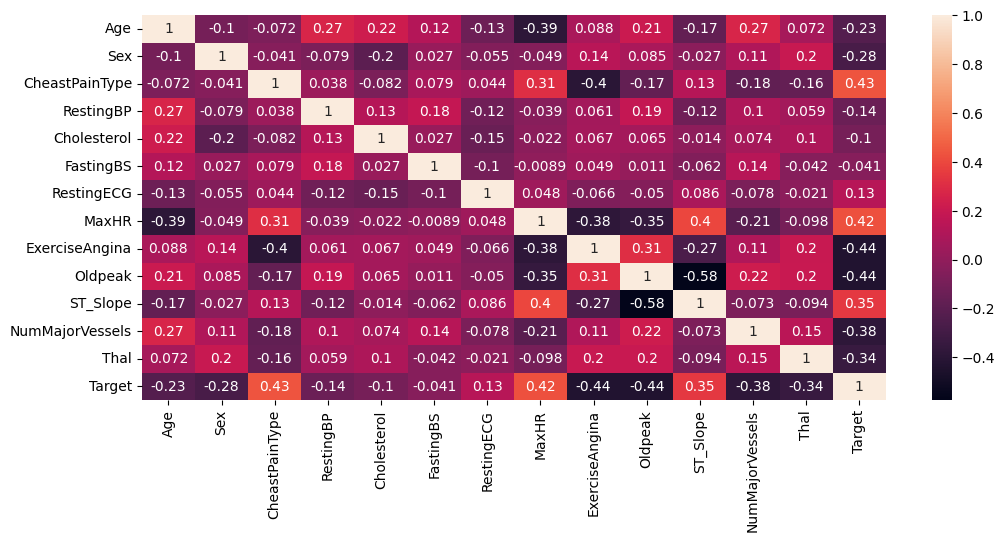

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)

# Note:
*You don't need high correlation between independent variables. If some features are strongly correlated with each other (for example, >0.8), it's better to handle multicollinearity (either by removing one of the variables or using techniques like PCA).*

### `First, analysing the target variable`*

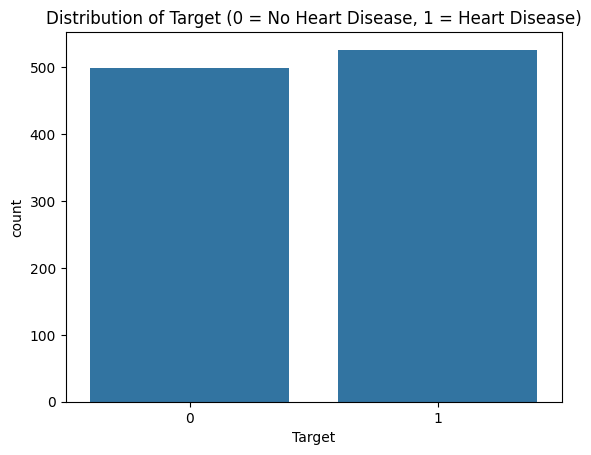

In [ ]:

# Plot Target variable distribution
sns.countplot(x='Target',data=df)
plt.title('Distribution of Target (0 = No Heart Disease, 1 = Heart Disease)')
plt.show()

In [ ]:
countNoDisease = len(df[df.Target == 0])
countHaveDisease = len(df[df.Target == 1])

print("Patience without heart problems: ", countNoDisease)
print("Patience with heart problems: ", countHaveDisease)


Patience without heart problems:  499
Patience with heart problems:  526


### . **`We'll analyse 'Age', 'Sex', 'CheastPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'NumMajorVessels', 'Thal'`**
# Steps:
    1. Analysing the 'Age' feature
    2. Analysing the 'Sex' feature
    3. Analysing the 'Chest Pain Type' feature
    4. Analysing the FBS feature
    5. Analysing the RestingECG feature
    6. Analysing the 'ExerciseAngina' feature
    7. Analysing the ST_Slope feature
    8. Analysing the 'NumMajorVessels' feature
    9. Analysing the 'Thal' feature

# I. Analysing the 'Age' feature

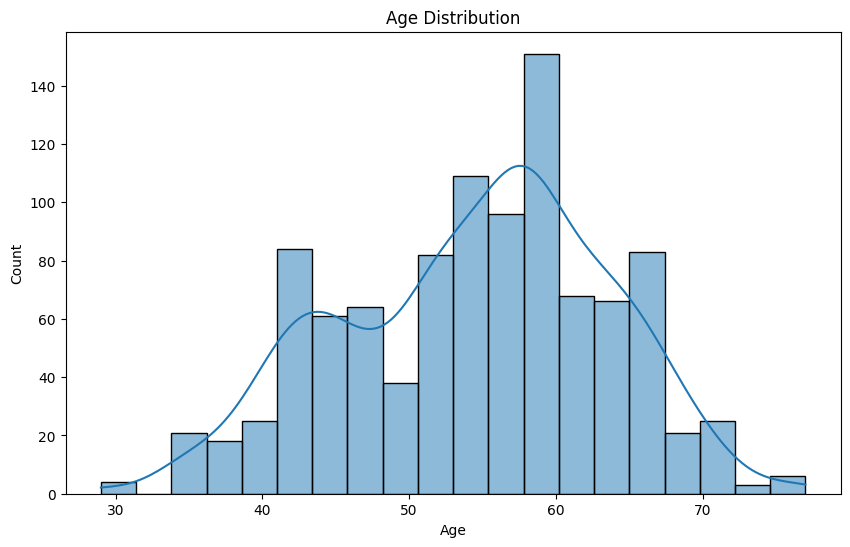

In [ ]:
# Plot distribution of Age
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# II. Analysing the 'Sex' feature


In [ ]:
df['Sex'].unique()

array([1, 0])

* **We notice, that as expected, the 'sex' feature has 2 unique features***

<Axes: xlabel='Sex', ylabel='Target'>

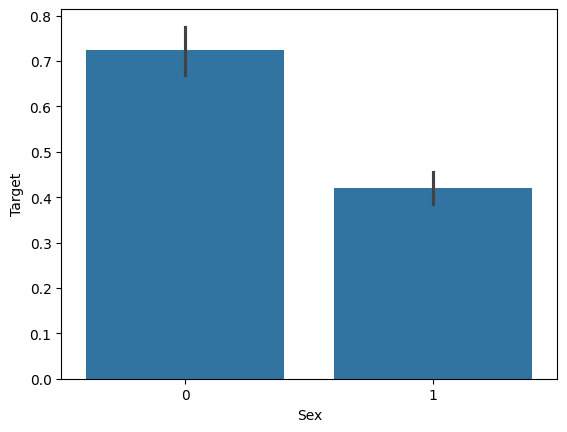

In [ ]:
y = df['Target']
sns.barplot(x=df["Sex"],y=y)

* **We notice, that females are more likely to have heart problems than males**


## III. Analysing the 'Chest Pain Type' feature


In [ ]:
df["CheastPainType"].unique()

array([0, 1, 2, 3])

* **As expected, the CP feature has values from 0 to 3**


<Axes: xlabel='CheastPainType', ylabel='Target'>

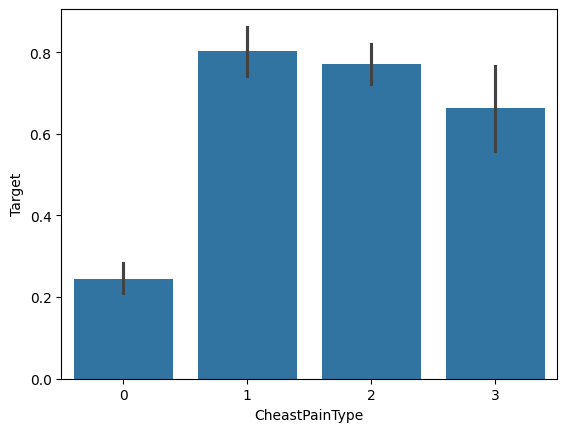

In [ ]:
sns.barplot(x=df["CheastPainType"], y=y)

* **We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems**

# IV.  Analysing the FBS feature


In [ ]:
df["FastingBS"].describe()


,FastingBS
count,1025.000000
mean,0.149268
std,0.356527
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df['FastingBS'].unique()

array([0, 1])

<Axes: xlabel='FastingBS', ylabel='Target'>

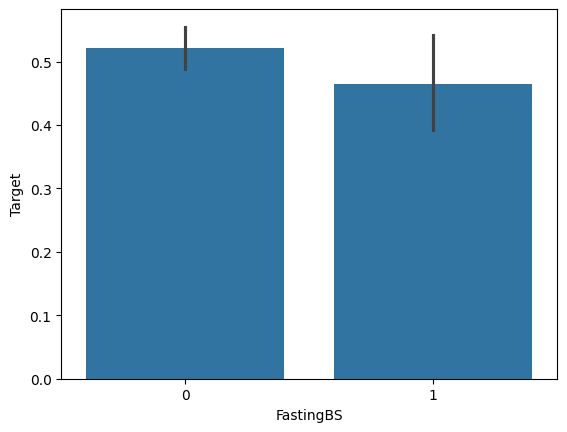

In [ ]:
sns.barplot(x=df["FastingBS"],y=y)


* **Nothing extraordinary here**


# V. Analysing the RestingECG feature


In [ ]:
df["RestingECG"].unique()

array([1, 0, 2])

<Axes: xlabel='RestingECG', ylabel='Target'>

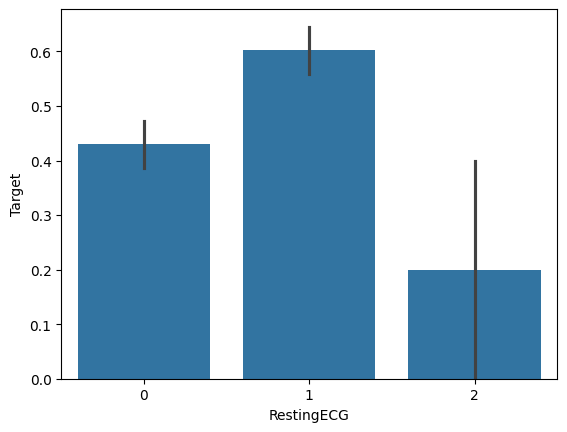

In [ ]:
sns.barplot(x=df["RestingECG"],y=y)


* **We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'**

# VI. Analysing the 'ExerciseAngina' feature


In [ ]:
df["ExerciseAngina"].unique()


array([0, 1])

<Axes: xlabel='ExerciseAngina', ylabel='Target'>

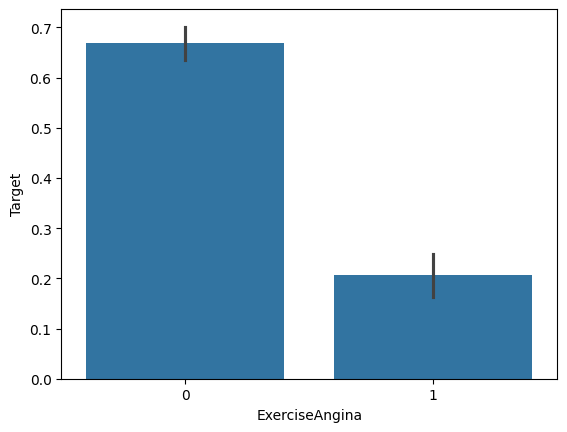

In [ ]:
sns.barplot(x=df["ExerciseAngina"],y=y)


* **People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems**
*

# VII. Analysing the ST_Slope feature


In [ ]:
df["ST_Slope"].unique()

array([2, 0, 1])

<Axes: xlabel='ST_Slope', ylabel='Target'>

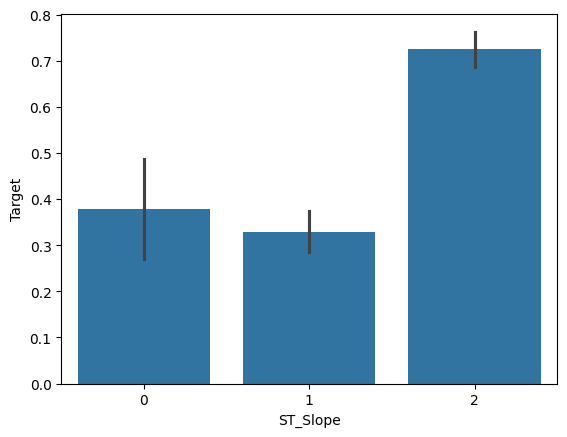

In [ ]:
sns.barplot(x=df["ST_Slope"], y=y)

* **We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'**




# VIII. Analysing the 'NumMajorVessels' feature


In [ ]:
# number of major vessels (0-3) colored by flourosopy

In [ ]:
df["NumMajorVessels"].unique()

array([2, 0, 1, 3, 4])

<Axes: ylabel='count'>

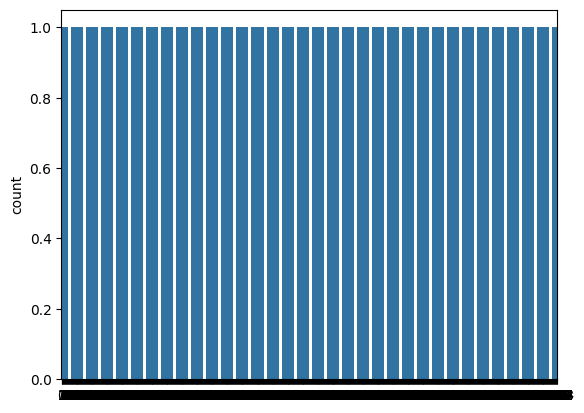

In [ ]:
sns.countplot(df["NumMajorVessels"])


<Axes: xlabel='NumMajorVessels', ylabel='Target'>

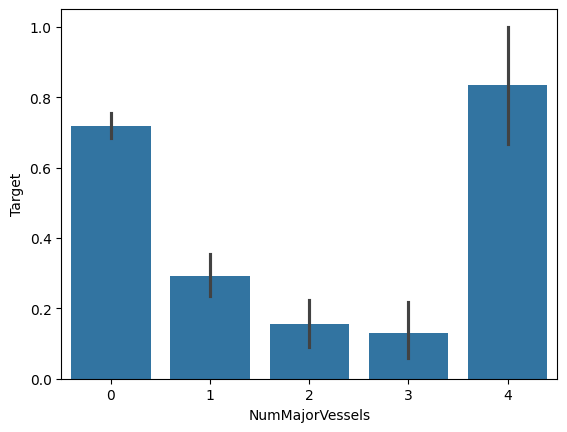

In [ ]:
sns.barplot(x=df["NumMajorVessels"], y=y)


* **NumMajorVessels=4 has astonishingly large number of heart patients**


# IX.  Analysing the 'Thal' feature


In [ ]:
df["Thal"].unique()


array([3, 2, 1, 0])

<Axes: xlabel='Thal', ylabel='Target'>

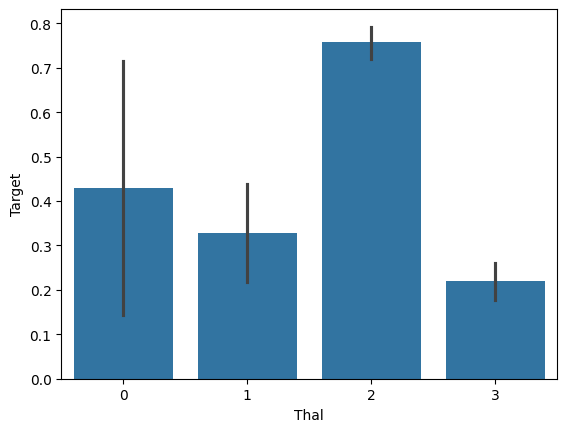

In [ ]:
sns.barplot(x=df["Thal"], y=y)


<Axes: xlabel='Thal', ylabel='Density'>

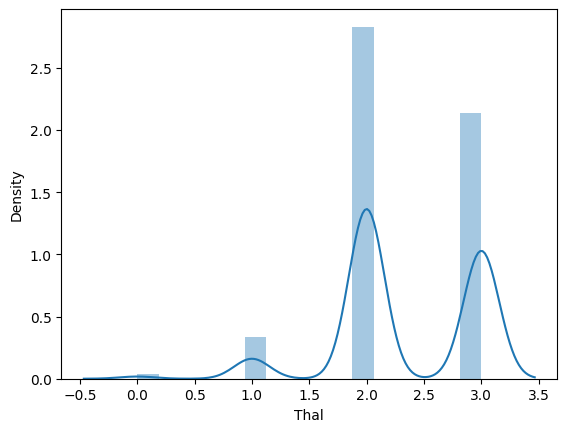

In [ ]:
sns.distplot(df["Thal"])


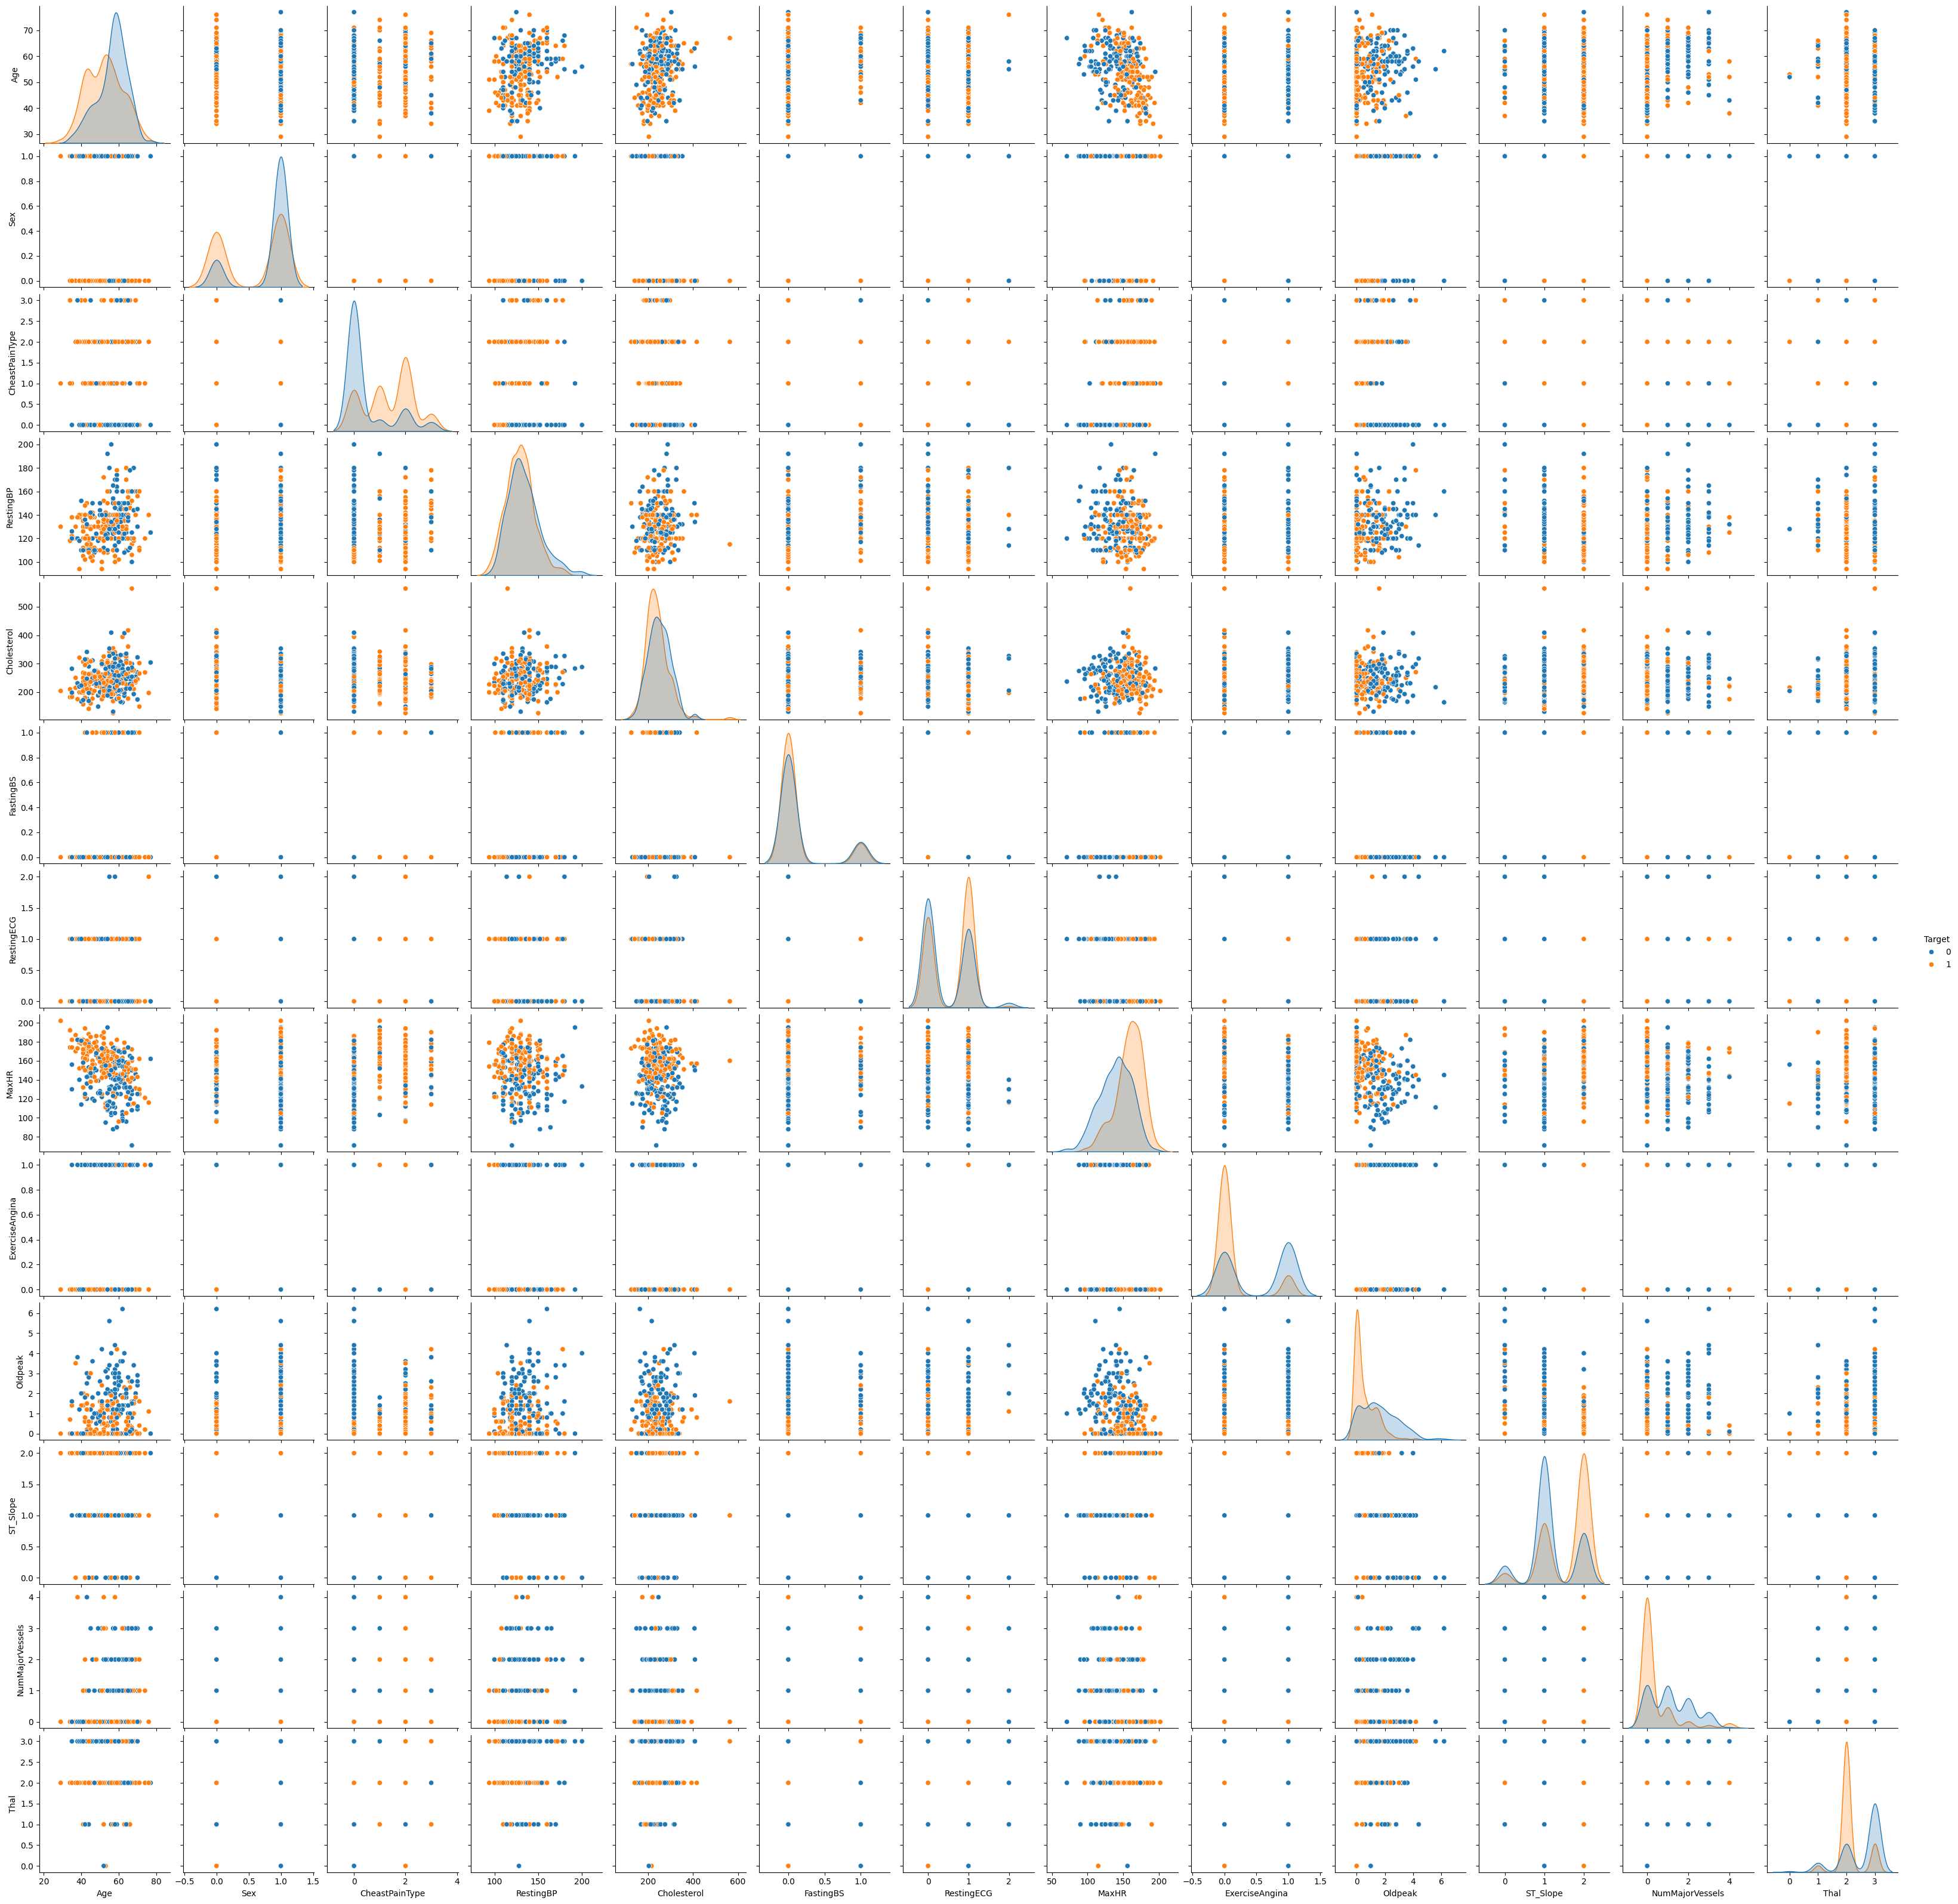

In [ ]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='Target')
plt.show()

# 3. **Data Splitting and Scaling**

In [ ]:
X = df.iloc[:,:-1] # Independent Variables
y = df.iloc[:,-1] # Dependent Variables

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# `Feature Engineering`

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Model Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred.shape

(205,)

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuarcy: {accuracy * 100:.2f}%")

Accuarcy: 79.51%


# 5. **Training and Evaluating**

In [ ]:
# Define the models

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "MLP Classifier": MLPClassifier(max_iter=500)
}

In [ ]:
# Define the metrics we want to evaluate for each model
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [ ]:
results = []

# Train and evaluate each model using K-fold cross-validation
for name, model in models.items():
    start_time = time() # Start the timer
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)
    end_time = time() # End the timer

    # Compute the average of each metric across the folds
    accuracy = np.mean(scores['test_accuracy'])
    precision = np.mean(scores['test_precision'])
    recall = np.mean(scores['test_recall'])
    f1 = np.mean(scores['test_f1'])
    auc = np.mean(scores['test_roc_auc'])
    elapsed_time = end_time - start_time # Time taken to run the model


    # Store the results in the list
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'AUC': auc,
        'Time (s)': elapsed_time
    })


    print(f"{name} completed in {elapsed_time:4f} seconds.")

Logistic Regression completed in 0.179298 seconds.
Random Forest completed in 2.027551 seconds.
SVM completed in 0.667326 seconds.
Decision Tree completed in 0.125396 seconds.
KNN completed in 0.165541 seconds.
Naive Bayes completed in 0.069290 seconds.
Gradient Boosting completed in 1.159510 seconds.
AdaBoost completed in 0.781145 seconds.
Bagging Classifier completed in 0.288648 seconds.
MLP Classifier completed in 7.077863 seconds.


# 6. **Display Detailed Performance Results**

In [ ]:
# Convert results into a DataFrame for better visualization
results_df = pd.DataFrame(results)

In [ ]:
results_df

,Model,Accuracy,Precision,Recall,F1-score,AUC,Time (s)
0,Logistic Regression,0.848780,0.824850,0.900672,0.860337,0.922821,0.179298
1,Random Forest,0.982927,0.979288,0.988235,0.983511,0.996680,2.027551
2,SVM,0.919512,0.912316,0.936303,0.923314,0.966205,0.667326
3,Decision Tree,0.982927,0.984002,0.983473,0.983397,0.982987,0.125396
4,KNN,0.842683,0.835206,0.867675,0.850507,0.938750,0.165541
5,Naive Bayes,0.831707,0.820141,0.862857,0.840939,0.910822,0.069290
6,Gradient Boosting,0.956098,0.942434,0.976443,0.958540,0.984784,1.159510
7,AdaBoost,0.890244,0.885133,0.905518,0.894892,0.951613,0.781145
8,Bagging Classifier,0.973171,0.974909,0.974062,0.973961,0.988075,0.288648
9,MLP Classifier,0.978049,0.972545,0.985854,0.978929,0.986066,7.077863


In [ ]:
# Sort by Accuracy (or any other metric of your choice)
results_df = results_df.sort_values(by="Accuracy", ascending=False)

In [ ]:
results_df

,Model,Accuracy,Precision,Recall,F1-score,AUC,Time (s)
1,Random Forest,0.982927,0.979288,0.988235,0.983511,0.996680,2.027551
3,Decision Tree,0.982927,0.984002,0.983473,0.983397,0.982987,0.125396
9,MLP Classifier,0.978049,0.972545,0.985854,0.978929,0.986066,7.077863
8,Bagging Classifier,0.973171,0.974909,0.974062,0.973961,0.988075,0.288648
6,Gradient Boosting,0.956098,0.942434,0.976443,0.958540,0.984784,1.159510
2,SVM,0.919512,0.912316,0.936303,0.923314,0.966205,0.667326
7,AdaBoost,0.890244,0.885133,0.905518,0.894892,0.951613,0.781145
0,Logistic Regression,0.848780,0.824850,0.900672,0.860337,0.922821,0.179298
4,KNN,0.842683,0.835206,0.867675,0.850507,0.938750,0.165541
5,Naive Bayes,0.831707,0.820141,0.862857,0.840939,0.910822,0.069290


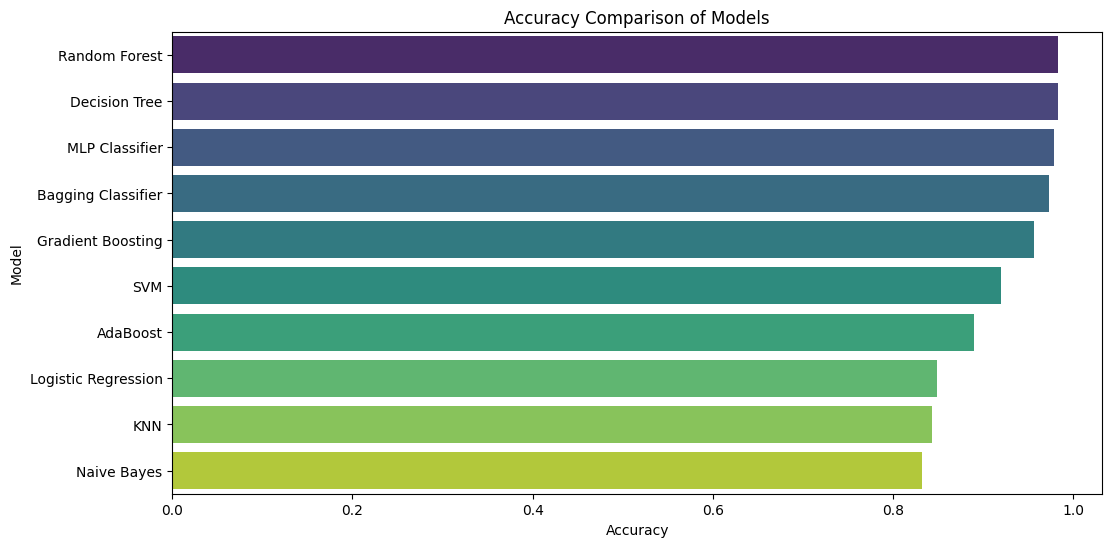

In [ ]:
# Plot the model accuarcy results
plt.figure(figsize=(12,6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Accuracy Comparison of Models")
plt.show()

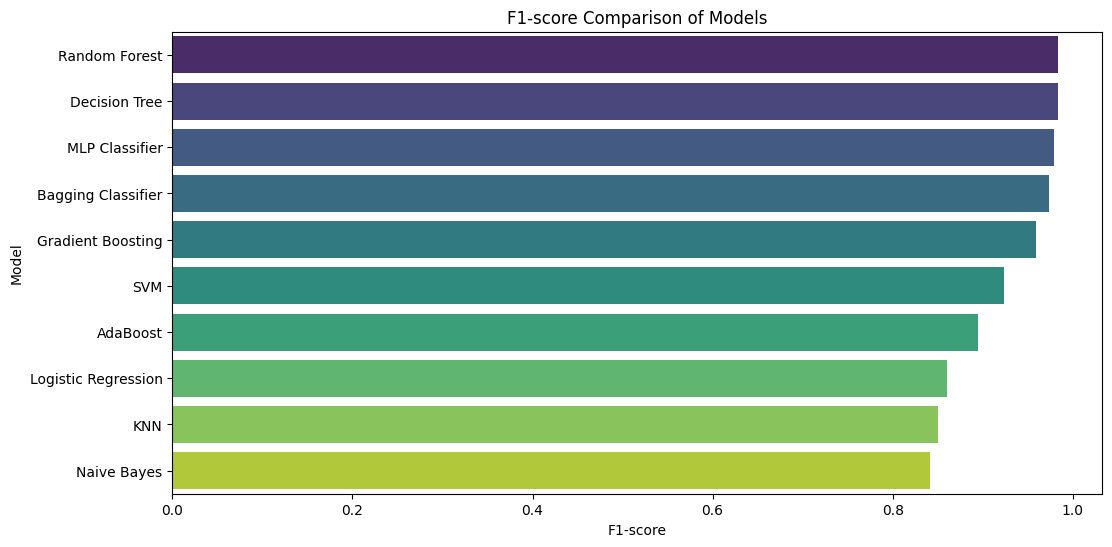

In [ ]:
# Plot the model accuarcy results
plt.figure(figsize=(12,6))
sns.barplot(x="F1-score", y="Model", data=results_df, palette="viridis")
plt.title("F1-score Comparison of Models")
plt.show()

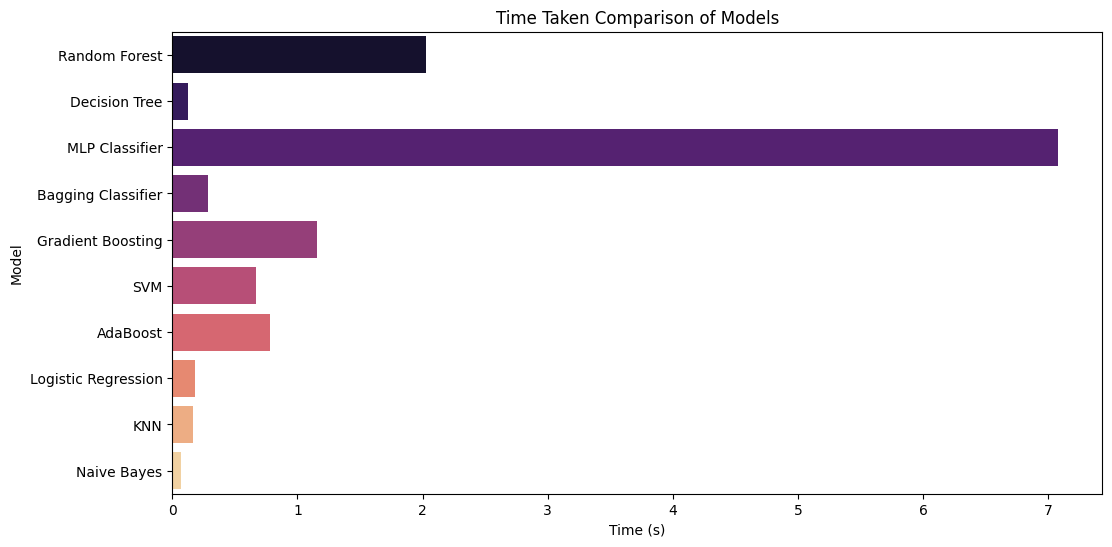

In [ ]:
# Plot the time comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="Time (s)", y="Model", data=results_df, palette="magma")
plt.title("Time Taken Comparison of Models")
plt.show()

# 7. Output final score

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

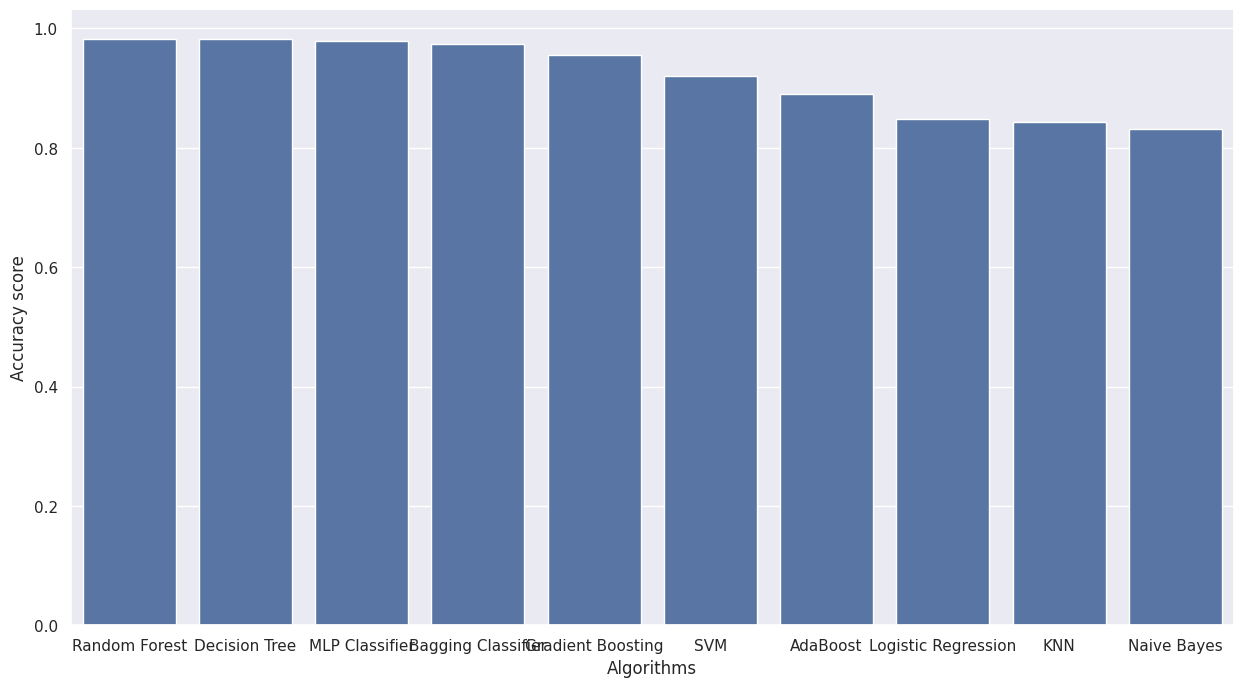

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=results_df['Model'], y=results_df['Accuracy'])

# Hey , Random Forest gives better results compared to other algorithms.